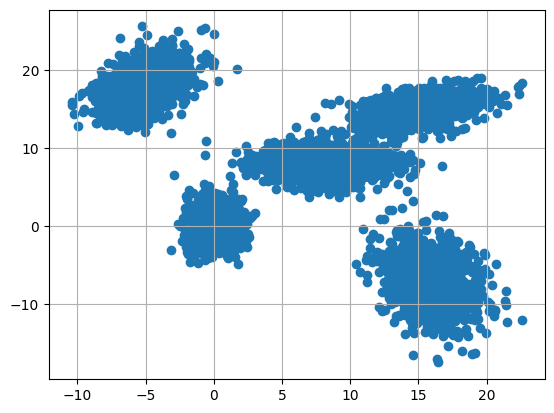

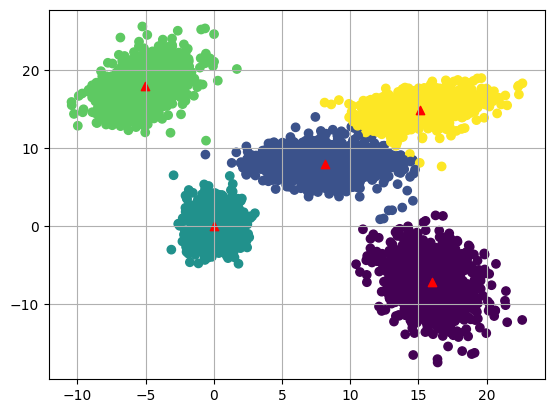

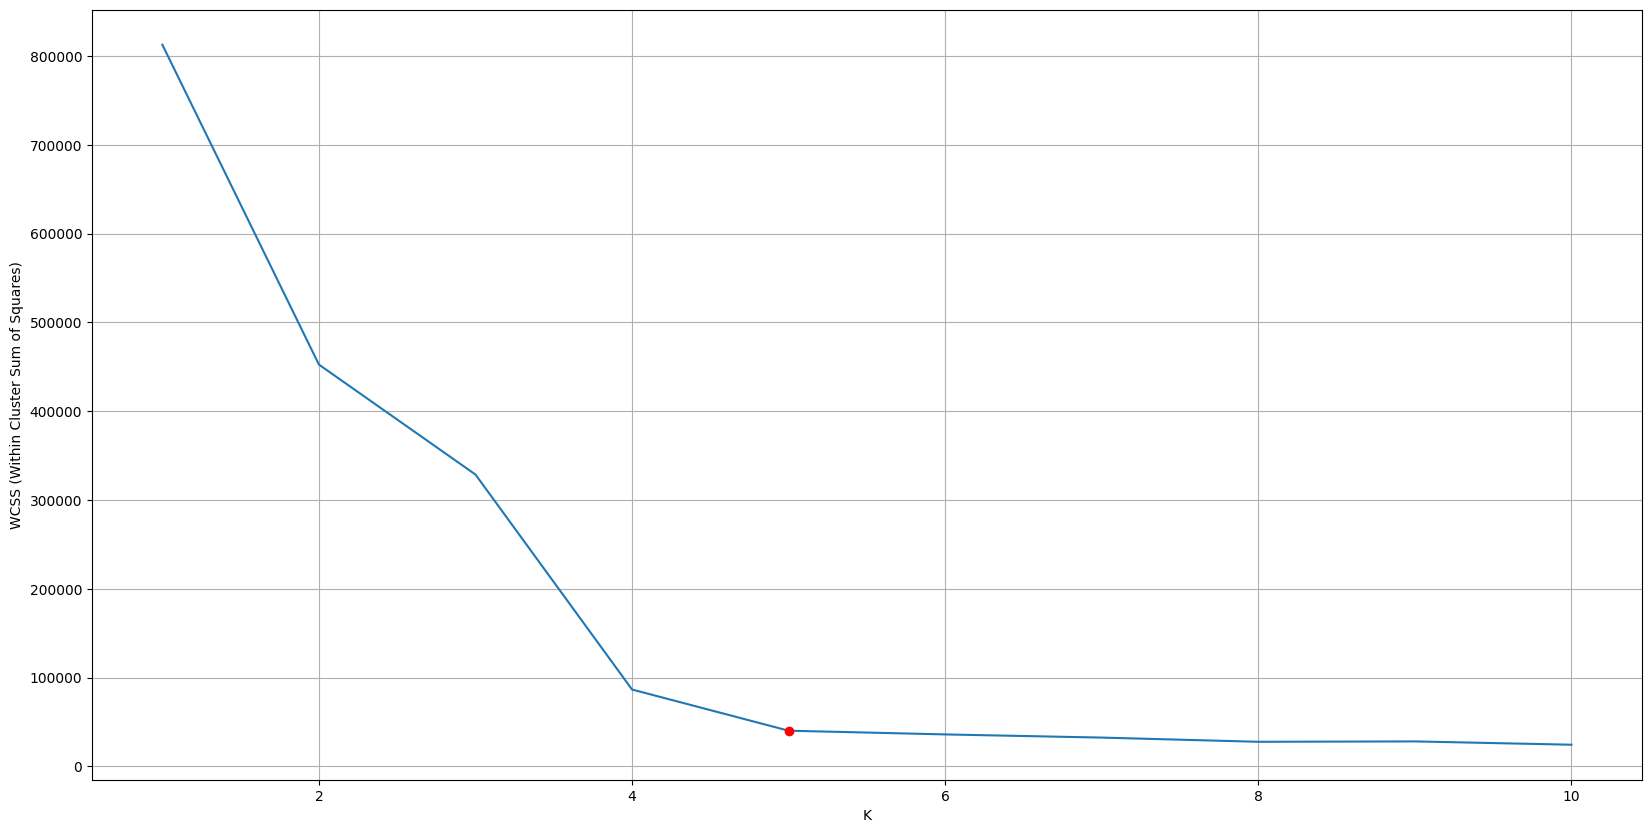

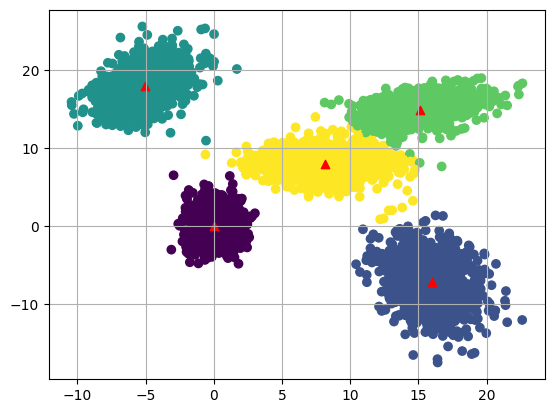

In [6]:
#Import numpy for mathematical function use
import numpy as np
#Import matplotlib for data visualization
import matplotlib.pyplot as plt

#Load text from data file
data = np.loadtxt('data.txt')

#Returns first index from all lists in data list, which is the x coordinate
x = data[:, 0]
#Returns second index from all lists in data list, which is the y coordinate
y = data[:, 1]
#Scatters x and y in a plot
plt.scatter(x, y)
#Adding a grid for better visibility
plt.grid(True)
#Shows the plot prior to k means clustering
plt.show()

#Function used to assign coordinates to a particular cluster
def assign_clusters(data, clusters, k):
    #For every k
    for kAmt in range(k):
        #Reset points list to assign clusters from anew
        clusters[kAmt]['points'] = []
    #Go through every data point
    for coordinate in range(data.shape[0]):
        #Initialize empty distance list to store all calculated distances
        dist = []
        #Set the current coordinate to be assigned to a cluster
        current_coordinate = data[coordinate]

        #For every cluster
        for kAmt in range(k):
            #Calculate distance from the current coordinate, and the current k cluster centroid
            distance = euclidian_distance(current_coordinate, clusters[kAmt]['center'])
            #Append that calculated distance to the calculated distances list
            dist.append(distance)
        #Get the indices of the smallest distance in the calculated distances list
        current_cluster = np.argmin(dist)
        #Add that coordinate to the cluster it is closest to
        clusters[current_cluster]['points'].append(current_coordinate)

    #Return newly calculated clusters
    return clusters

#Function used to update centroid after cluster points have been calculated and associated with the centroid
def update_centroids(data, clusters, k):
    #Go through every cluster
    for kAmt in range(k):
        #Get all points currently associated with k cluster
        points = np.array(clusters[kAmt]['points'])
        #Check that there is atleast 1 points assigned to a centroid
        if points.shape[0] > 0:
            #Calculate the new centroid by getting the mean of all coordinates associated with current centroid
            new_center = points.mean(axis = 0)
            #Set the current centroid to the newly calculated centroid
            clusters[kAmt]['center'] = new_center

    #Return newly calculated clusters
    return clusters;

#Function used to associate coordinate with its respective cluster for labeling purposes
def predict_cluster(data, clusters, k):
    #Initialize empty list to store the associated cluster
    prediction = []
    #Go through every coordinate
    for i in range(data.shape[0]):
        #Empty list to store all distances from the current coordinate and all clusters, 1 by 1
        distance = []
        #Go through every cluster
        for j in range(k):
            #Add calculated distance from current cluster and current centroid
            distance.append(euclidian_distance(data[i], clusters[j]['center']))
        #Add the index of the closest centroid
        prediction.append(np.argmin(distance))

    #Return list of closest centroids in the same order of the coordinate with which it is closest to
    return prediction

#Helper function to calculate distances between 2 points
def euclidian_distance(p1, p2):
    #Return mathematical formula for calculating distance between 2 points
    return np.sqrt(np.sum((p1 - p2) ** 2))

#Kmeans clustering function
def kmeans_fall2025(data, k):
    #Empty dictionary to hold centroids and their associated data points
    clusters = {}

    #
    # STEP 1:
    #
    
    #Create k clusters times at a random coordinate
    for centroid in range(k):
        #Set center to be a random point in the data set
        center = data[np.random.randint(0, data.shape[0])]
        #Set cluster's center to this random point, with an empty list for points to be calculated in the future
        cluster = {'center' : center, 'points' : []}
        #Add this cluster to the dictionary of clusters
        clusters[centroid] = cluster

    #Initialize centroid_movement with a large value to allow for first iteration
    centroid_movement = 1000000
    #Set the convergence limit
    convergence_limit = 0.0000001

    #
    # STEP 4:
    #
    #While the movement of the centroids is larger than the limit (AKA, is over the limit)
    while centroid_movement > convergence_limit:
        #Set centroid_movement to zero to allow for as many iterations as possible
        centroid_movement = 0

        #Initialize list of current centroid coordinates before assigning coordinates to a cluster and before updaing centroid coordinates
        current_centroids = []
        #Go through every cluster
        for i in clusters:
            #Add the coordinate of the centroid to the list
            current_centroids.append(clusters[i]['center'])

        #
        # STEP 2:
        #
        #Assign coordinates to the clusters
        clusters = assign_clusters(data, clusters, k)
        
        #
        # STEP 3:
        #
        #Update centroid locations
        clusters = update_centroids(data, clusters, k)

        #Initialize empty list of where the new centroids will be kept after assigning coordinates and updating centroid locations
        new_centroids = []
        #Go through every cluster (again)
        for i in clusters:
            #Add the updated centroid to the list
            new_centroids.append(clusters[i]['center'])

        #For every k cluster
        for i in range(k):
            #Sum the total movement between
            centroid_movement += (euclidian_distance(new_centroids[i], current_centroids[i]))

    #Return calculated clusters
    return clusters

#k value to be used for cluster amount
k = 5
#Call the kmeans clustering algorithm
clusters = kmeans_fall2025(data, k)

#Store associating of each cluster and each coordinate for labeling purposes
prediction = predict_cluster(data, clusters, k)

#Scatter coordinates after clustering, using the prediction for color
plt.scatter(x, y, c = prediction)
#Added grid for visibility
plt.grid(True)
#Go through every cluster
for i in clusters:
    #Get centroid for current cluster
    center = clusters[i]['center']
    #Scatter the centroids with an arrow for a symbol, and a color or red
    plt.scatter(center[0], center[1], marker = '^', c = 'red')

#Show the final calculated scatterplot
plt.show()

#Function to calculate wcss for a particular k value
def calculate_wcss(clusters, k):
    #Initialize wcss to 0
    WCSS = 0
    #Go through every cluster in the data set
    for kAmt in range(k):
        #Go through every point for each cluster
        for point in clusters[kAmt]['points']:
            #Get distance between each point and its respective cluster's centroid
            distance_between = euclidian_distance(clusters[kAmt]['center'], point)
            #Add the squared distance between to the WCSS
            WCSS += (distance_between ** 2)
    #Return the final WCSS once all squared distances for every point and its respective centroid, and add them all together for k clusters
    return WCSS

#Empty list to store all WCSS values we wish to calculate
WCSS_values = []

#
# STEP 1: (Part B)
#

#Try values 1 through 10, making sure to not use 0
for kValues in range(1, 11):
    #Call k-means clustering for every k amount
    clusters = kmeans_fall2025(data, kValues)
    #
    # STEP 2: (Part B)
    #
    #Calculate the WCSS for that k amount
    WCSS = calculate_wcss(clusters, kValues)
    #Add the calculated WCSS value for every k value to be tried
    WCSS_values.append(WCSS)

#
# STEP 3: (Part B)
#
#Create new figure 
plt.figure(figsize = (20, 10))
#Plot wcss values, making sure to use same amount of tested k values
plt.plot(range(1, 11), WCSS_values, markevery=[5])
#Highlight the k value that I believe to be optimal based on the elbow method
plt.plot(5, WCSS_values[4], 'ro')
#K label for x axis
plt.xlabel('K')
#WCSS label for y axis
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
#Give the figure grid
plt.grid(True)
#Show it
plt.show()

#
# STEP 4: (Part B)
#
#Call the kmeans clustering algorithm
clusters = kmeans_fall2025(data, k)

#Store associating of each cluster and each coordinate for labeling purposes
prediction = predict_cluster(data, clusters, k)

#Scatter coordinates after clustering, using the prediction for color
plt.scatter(x, y, c = prediction)
#Added grid for visibility
plt.grid(True)
#Go through every cluster
for i in clusters:
    #Get centroid for current cluster
    center = clusters[i]['center']
    #Scatter the centroids with an arrow for a symbol, and a color or red
    plt.scatter(center[0], center[1], marker = '^', c = 'red')

#Show the final calculated scatterplot using the ideal k value gained from the calculated WCSS scores and determined via the elbow method
plt.show()